<a href="https://colab.research.google.com/github/cankalsoftware/Active-Anti-Spoofing-for-Facial-Recognition-Systems-/blob/master/Copy_of_Air_Quality_Data_in_India_(2015_2020)_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
rohanrao_air_quality_data_in_india_path = kagglehub.dataset_download('rohanrao/air-quality-data-in-india')

print('Data source import complete.')


# **Air Quality Data in India (2015-2020)**

Air Quality Data in India (2015-2020):
As part of this analysis the values in the data for the analysisi are;

- PM2.5 and PM10: Particulate matter
- NO, NO2, NOx: Nitrogen oxides
- NH3: Ammonia
- CO: Carbon monoxide
- SO2: Sulfur dioxide
- O3: Ozone
- Benzene, Toluene, Xylene: Volatile organic compounds

The above data will be analised to predict the future air quality from a past data with regression and clasification methods;
However, ther are some known issues in the date that needs to be processed first. These are;

Missing Values: Several columns, including the target column, have missing values.

Correction Values: Some data values needs to be coverted for easy calcualtion and processes.

Outliers: Data needs to be cleaned for better predictions

Erroneous : Data needs to be cleaned from the errors.

## WEKA
There will also be a data set extract for WEKA processes

In [ ]:
# First load the libraries that we need for the data analysisi, scaling, normalising and encoding

import numpy as np # calculations and algebra
import pandas as pd # data import
import matplotlib.pyplot as plt # visualisation
import seaborn as sns # visualisation
import datetime # data conversion and calculation
# from warnings import filterwarnings
# filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os # data file read adn processes
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# In the given dataset we have multiple data grous but we will only work on the City_day data group
df_city_day = pd.read_csv('/kaggle/input/air-quality-data-in-india/city_day.csv')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-quality-data-in-india/stations.csv
/kaggle/input/air-quality-data-in-india/station_hour.csv
/kaggle/input/air-quality-data-in-india/city_day.csv
/kaggle/input/air-quality-data-in-india/city_hour.csv
/kaggle/input/air-quality-data-in-india/station_day.csv


**ANALYZING THE DATASET**
- Size, data types, null value rate, statistical information for each column

In [ ]:
# Print the data file for the first 5 data row.
df_city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
# Print the data size within the data file. It will list that there are 29531 rows and 16 colums in the data set
df_city_day.shape

(29531, 16)

In [ ]:
# Print the each data type and data count on each type( Column) witin the data set
df_city_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
# List the all numarical columns with their current calculations in Table mode
df_city_day.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24933.0,67.450578,64.661449,0.04,28.820,48.57,80.5900,949.99
PM10,18391.0,118.127103,90.605110,0.01,56.255,95.68,149.7450,1000.00
NO,25949.0,17.574730,22.785846,0.02,5.630,9.89,19.9500,390.68
NO2,25946.0,28.560659,24.474746,0.01,11.750,21.69,37.6200,362.21
NOx,25346.0,32.309123,31.646011,0.00,12.820,23.52,40.1275,467.63
NH3,19203.0,23.483476,25.684275,0.01,8.580,15.85,30.0200,352.89
CO,27472.0,2.248598,6.962884,0.00,0.510,0.89,1.4500,175.81
SO2,25677.0,14.531977,18.133775,0.01,5.670,9.16,15.2200,193.86
O3,25509.0,34.491430,21.694928,0.01,18.860,30.84,45.5700,257.73
Benzene,23908.0,3.280840,15.811136,0.00,0.120,1.07,3.0800,455.03


In [ ]:
# List the total count of the Missing ( Null) values in each data column and calculate the percantage ratio of the total data in each column
# This function will be used later on again to check null clearance
def show_null_value(df_city_day):
    null_val = df_city_day.isnull().sum()  # Find the total number of Null data for each data type( column)
    null_val_percent= 100 * df_city_day.isna().sum()/ len(df_city_day) # Calculates the percentage of blank values in terms of the total data in the column
    null_val_table = pd.concat([null_val, null_val_percent], axis=1)# Concatenates the number of null data count and percentage of null values to a new table
    null_val_table_columns = null_val_table.rename(columns = {0 : '>Missing Values', 1 : '> Total Null Values %'})
    return null_val_table_columns # Print the new table with Null values count and percentage of total values
# call the fanction
show_null_value(df_city_day)

,>Missing Values,> Total Null Values %
City,0,0.000000
Date,0,0.000000
PM2.5,4598,15.570079
PM10,11140,37.723071
NO,3582,12.129626
NO2,3585,12.139785
NOx,4185,14.171549
NH3,10328,34.973418
CO,2059,6.972334
SO2,3854,13.050692


In [ ]:
# Convert the Date column of object field to Date format
df_city_day['Date'] = pd.to_datetime(df_city_day['Date'], format='%Y-%m-%d')
# Sort the data by date
df_city_day = df_city_day.sort_values(by = 'Date')
# disply the first 5 row
df_city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
7834,Chennai,2015-01-01,NaN,NaN,16.30,15.39,22.68,4.59,1.17,9.20,11.35,0.17,NaN,NaN,NaN,NaN
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
19846,Lucknow,2015-01-01,NaN,NaN,2.11,13.46,4.57,NaN,12.15,169.57,25.92,1.35,3.93,NaN,NaN,NaN
21855,Mumbai,2015-01-01,NaN,NaN,NaN,NaN,27.38,NaN,0.00,NaN,NaN,0.00,0.00,0.00,NaN,NaN


In [ ]:
# display the minimum and maximum date
df_city_day['Date'].min() , df_city_day['Date'].max()

(Timestamp('2015-01-01 00:00:00'), Timestamp('2020-07-01 00:00:00'))

For the lineer calculations, some of the data fields are not neeeded for the AQI regresssion calculation.

AQI_Bucket is one of them and it can be removed from the dataset.

However if classification calculation needed , this can be kept.

In [ ]:
# Print the all available columns
df_city_day.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
# Data Extract for WEKA processes. This section may skipped if no WEKA data needed
df_city_day_full = df_city_day.copy()
df_city_day_full.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

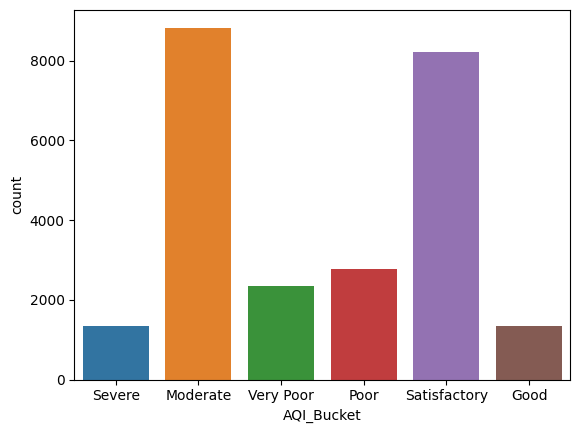

In [ ]:
# Visuall AQI_Bucket
sns.countplot(x=df_city_day_full["AQI_Bucket"]);

In [ ]:
# remove(drop) the AQI_Bucket for regression calculations
df_city_day = df_city_day.drop(["AQI_Bucket"], axis=1)
# Print the all available columns
df_city_day.columns


Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [ ]:
# Check the columns now
df_city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN
7834,Chennai,2015-01-01,NaN,NaN,16.30,15.39,22.68,4.59,1.17,9.20,11.35,0.17,NaN,NaN,NaN
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0
19846,Lucknow,2015-01-01,NaN,NaN,2.11,13.46,4.57,NaN,12.15,169.57,25.92,1.35,3.93,NaN,NaN
21855,Mumbai,2015-01-01,NaN,NaN,NaN,NaN,27.38,NaN,0.00,NaN,NaN,0.00,0.00,0.00,NaN


In [ ]:
# Check the columns for WEKA data now
df_city_day_full.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
7834,Chennai,2015-01-01,NaN,NaN,16.30,15.39,22.68,4.59,1.17,9.20,11.35,0.17,NaN,NaN,NaN,NaN
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
19846,Lucknow,2015-01-01,NaN,NaN,2.11,13.46,4.57,NaN,12.15,169.57,25.92,1.35,3.93,NaN,NaN,NaN
21855,Mumbai,2015-01-01,NaN,NaN,NaN,NaN,27.38,NaN,0.00,NaN,NaN,0.00,0.00,0.00,NaN,NaN


**Outliers**

Print the boxplots to observe outlier data on the numefical values.

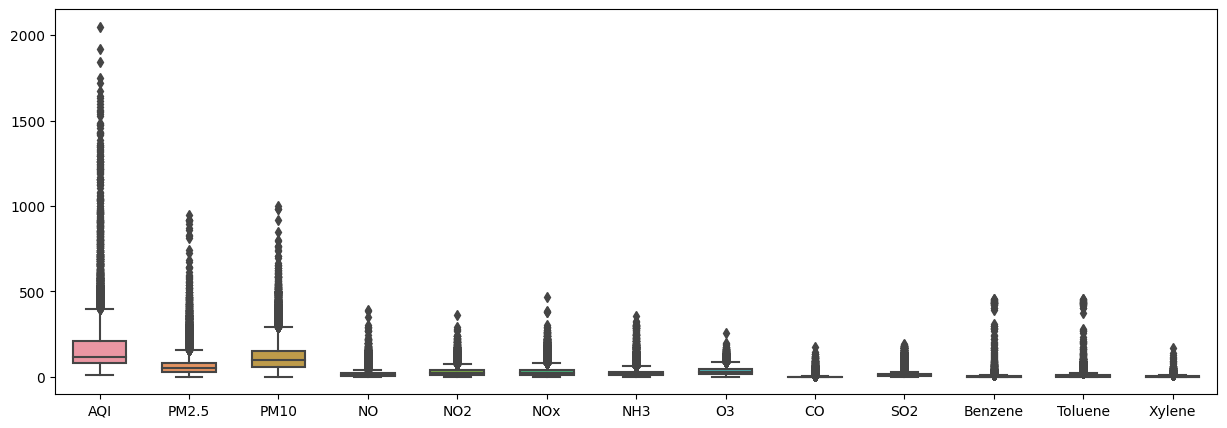

In [ ]:
# Adjust the plot size
plt.figure(figsize=(15, 5))
# Set the float columns for boxplot. These are the data fields that need for ML.
sns.boxplot(data=df_city_day[[ 'AQI','PM2.5', 'PM10','NO', 'NO2', 'NOx','NH3','O3', 'CO', 'SO2','Benzene', 'Toluene', 'Xylene']],width=0.6)
# Display
plt.show()



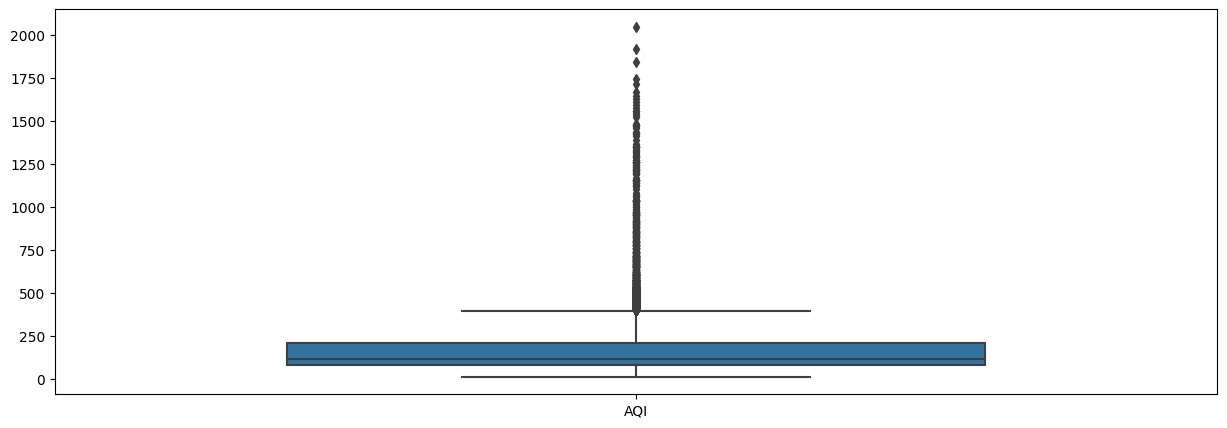

In [ ]:
#After some analysis in WEKA , it has been notified that the AQI has some data that create noice and needs to be corrected by taking the outliers

# Adjust the plot size
plt.figure(figsize=(15, 5))
# Set the float columns for boxplot. These are the data fields that need for ML.
sns.boxplot(data=df_city_day[[ 'AQI']],width=0.6)
# Display
plt.show()

**DATA EDITING PROCESS**

As seen above there are some Null  and outliers in the data set.

As the outliers and Null values will shift the resutls, the modeling the data set needed.


For the WEKA data , the AQI data must be added to outliers list by changing the df_city_day dataset to df_city_day_full.

This will allow the AQI column to be added to ouliers processes

In [ ]:
# This  takes a DataFrame as a parameter and identifies outliers for numeric columns in the DataFrame.
# It replaces these outliers with the corresponding quartile values (Q1 and Q3).
# Outliers are identified using the interquartile range (IQR).
# create a function for regression and clasification data sets

def replace_outliers_with_quartiles(df_city_day):
    for column in df_city_day.select_dtypes(include=['number']).columns: # Used to cycle through all numeric columns in the DataFrame.
        Q1 = df_city_day[column].quantile(0.25)
        Q3 = df_city_day[column].quantile(0.75)
        IQR = Q3 - Q1
        # To identify outliers, lower and upper limits are calculated and values outside these limits are considered outliers.
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # For each column, Erroneous values identified and replace them with Q1 or Q3 by using a lambda function.
        # If the value is less than the lower band, it is replaced with Q1.
        # If it is greater than the upper band, it is replaced with Q3.
        # If the data not lower or upper band , the value is not changed and remains the same.
        df_city_day[column] = df_city_day[column].apply(
            lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
        )
    return df_city_day
# regression data set
# for WEKA, the data set must be set to df_city_day_full to add the AQI
df_city_day = replace_outliers_with_quartiles(df_city_day)
df_city_day

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.1500,NaN,0.92,27.64,45.57,0.00,0.02,0.00,NaN
7834,Chennai,2015-01-01,NaN,NaN,16.30,15.39,22.6800,4.59,1.17,9.20,11.35,0.17,NaN,NaN,NaN
10229,Delhi,2015-01-01,80.59,149.745,19.95,36.39,40.1275,33.85,1.45,9.25,41.68,3.08,9.15,3.35,208.0
19846,Lucknow,2015-01-01,NaN,NaN,2.11,13.46,4.5700,NaN,1.45,15.22,25.92,1.35,3.93,NaN,NaN
21855,Mumbai,2015-01-01,NaN,NaN,NaN,NaN,27.3800,NaN,0.00,NaN,NaN,0.00,0.00,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3072,Amaravati,2020-07-01,22.00,34.000,1.50,9.68,6.4000,8.45,0.59,10.88,29.15,0.10,0.50,NaN,54.0
26956,Talcher,2020-07-01,24.85,31.060,27.73,29.36,57.0900,1.37,1.52,14.42,14.90,0.00,NaN,NaN,101.0
28068,Thiruvananthapuram,2020-07-01,2.00,35.000,1.68,2.30,2.5800,5.62,0.42,6.15,22.10,NaN,NaN,NaN,41.0
7833,Chandigarh,2020-07-01,32.90,72.380,0.56,9.87,5.9200,36.63,0.33,14.91,34.33,3.31,0.33,0.46,66.0


In [ ]:
#  clasification data set for WEKA
df_city_day_full = replace_outliers_with_quartiles(df_city_day_full)
df_city_day_full

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.1500,NaN,0.92,27.64,45.57,0.00,0.02,0.00,NaN,NaN
7834,Chennai,2015-01-01,NaN,NaN,16.30,15.39,22.6800,4.59,1.17,9.20,11.35,0.17,NaN,NaN,NaN,NaN
10229,Delhi,2015-01-01,80.59,149.745,19.95,36.39,40.1275,33.85,1.45,9.25,41.68,3.08,9.15,3.35,208.0,Severe
19846,Lucknow,2015-01-01,NaN,NaN,2.11,13.46,4.5700,NaN,1.45,15.22,25.92,1.35,3.93,NaN,NaN,NaN
21855,Mumbai,2015-01-01,NaN,NaN,NaN,NaN,27.3800,NaN,0.00,NaN,NaN,0.00,0.00,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3072,Amaravati,2020-07-01,22.00,34.000,1.50,9.68,6.4000,8.45,0.59,10.88,29.15,0.10,0.50,NaN,54.0,Satisfactory
26956,Talcher,2020-07-01,24.85,31.060,27.73,29.36,57.0900,1.37,1.52,14.42,14.90,0.00,NaN,NaN,101.0,Moderate
28068,Thiruvananthapuram,2020-07-01,2.00,35.000,1.68,2.30,2.5800,5.62,0.42,6.15,22.10,NaN,NaN,NaN,41.0,Good
7833,Chandigarh,2020-07-01,32.90,72.380,0.56,9.87,5.9200,36.63,0.33,14.91,34.33,3.31,0.33,0.46,66.0,Satisfactory


In [ ]:
# Analyse the data after the outliers removed
df_city_day.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,29531,2018-05-14 05:40:15.807118080,2015-01-01 00:00:00,2017-04-16 00:00:00,2018-08-05 00:00:00,2019-09-03 00:00:00,2020-07-01 00:00:00,NaN
PM2.5,24933.0,54.975923,0.04,28.82,48.57,80.59,158.21,32.781561
PM10,18391.0,104.818086,0.01,56.255,95.68,149.7425,289.95,60.357602
NO,25949.0,12.472491,0.02,5.63,9.89,19.95,41.43,8.941774
NO2,25946.0,25.482607,0.01,11.75,21.69,37.62,76.4,16.698364
NOx,25346.0,26.520383,0.0,12.82,23.52,40.125625,81.06,17.876378
NH3,19203.0,19.661227,0.01,8.58,15.85,30.02,62.16,13.838362
CO,27472.0,0.952485,0.0,0.51,0.89,1.45,2.86,0.61346
SO2,25677.0,10.304869,0.01,5.67,9.16,15.22,29.54,5.908036
O3,25509.0,32.836577,0.01,18.86,30.84,45.57,85.63,17.969539


Let's see the new data after outliers in the boxplot

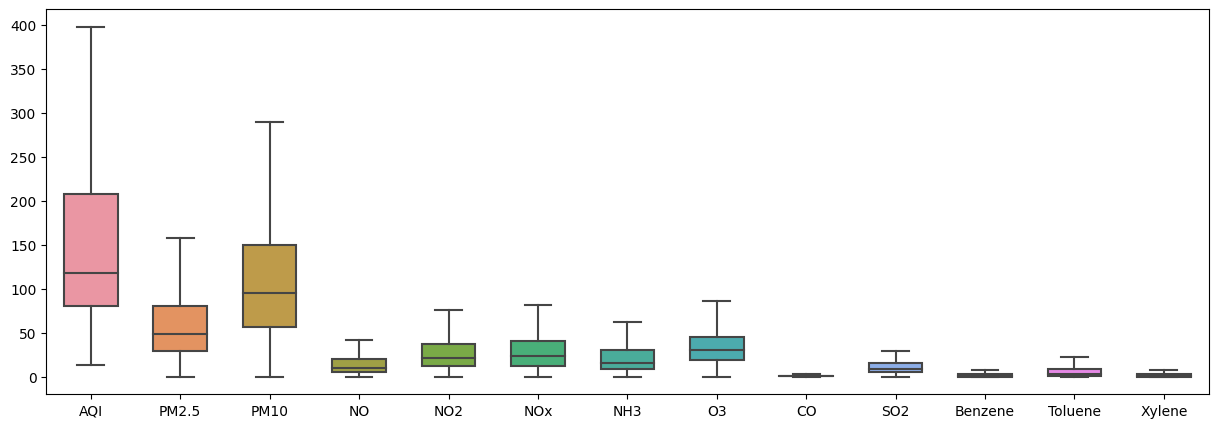

In [ ]:
# Adjust the plot size
plt.figure(figsize=(15, 5))
# Set the float columns for boxplot
sns.boxplot(data=df_city_day_full[[ 'AQI','PM2.5', 'PM10','NO', 'NO2', 'NOx','NH3','O3', 'CO', 'SO2','Benzene', 'Toluene', 'Xylene']],width=0.6)
# Display
plt.show()

In [ ]:
# Now that there are no outlier values, the full data set can be Extracted
extract = pd.DataFrame(df_city_day_full)
extract.to_csv('/kaggle/working/AQI_India_weka_no_outlier.csv',index=False)

In [ ]:
# Create a copy of the df_city_day without the city names for correlation, as we only need the numerical values
df=df_city_day.drop(columns=['City'])

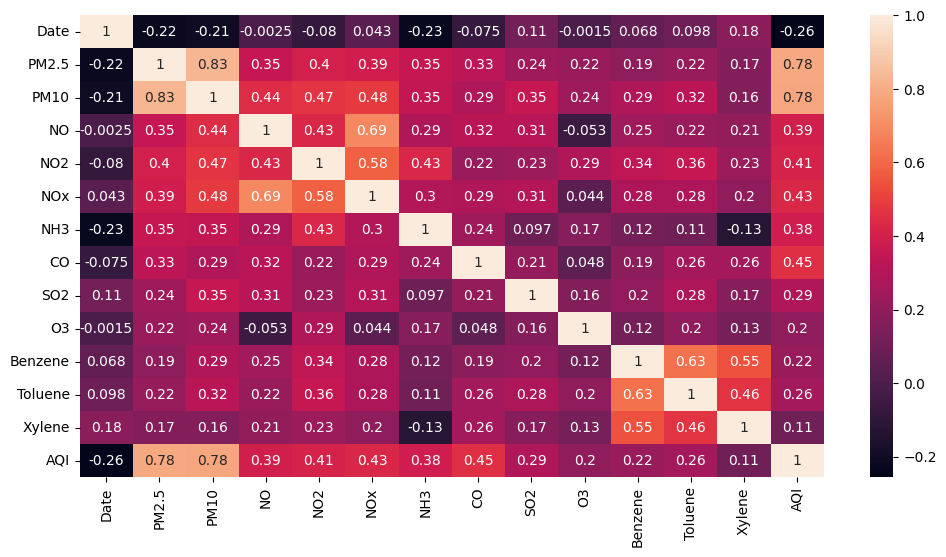

In [ ]:
# Let's create a new heatmap for the new data for all numerical values correlation
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),annot=True)
plt.show()

The most important variables affecting the AQI value appear to be PM2.5, PM10, CO and NOx. We will make predictions based on data above 0.25

In [ ]:
# From the correlation matrix to make best predictions, the most important variables affecting the AQI value appear to be above 0.25
# For wider calculation these columns can be kept, it is all depend on expectesions.
df_city_day=df_city_day.drop(columns=['Xylene', 'Benzene','O3']) # remove the Xylene, Benzene, O3 columns from df_city_day as they are below 0.25 expectasions.
# These coulumns can be dropped for WEKA classification use, too
df_city_day_full=df_city_day_full.drop(columns=['Xylene', 'Benzene','O3'])

In [ ]:
# Print the new data set
df_city_day_full.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.1500,NaN,0.92,27.64,0.02,NaN,NaN
7834,Chennai,2015-01-01,NaN,NaN,16.30,15.39,22.6800,4.59,1.17,9.20,NaN,NaN,NaN
10229,Delhi,2015-01-01,80.59,149.745,19.95,36.39,40.1275,33.85,1.45,9.25,9.15,208.0,Severe
19846,Lucknow,2015-01-01,NaN,NaN,2.11,13.46,4.5700,NaN,1.45,15.22,3.93,NaN,NaN
21855,Mumbai,2015-01-01,NaN,NaN,NaN,NaN,27.3800,NaN,0.00,NaN,0.00,NaN,NaN


In [ ]:
# Create a full Copy the data sets
df_full=df_city_day.copy()
df_full_clsf=df_city_day_full.copy()

In [ ]:
# There were some Null values in AQI. For calculation and predictions, AQI cannot be null.
# Remove all null AQI rows and add into a new data set
df_full=df_city_day[df_city_day['AQI'].notna()]
# Same for the WEKA classification data set as well as the AQIBucket as these columns will be the main driver of the predictions
df_full_clsf=df_city_day_full[df_city_day_full['AQI'].notna()]
df_full_clsf=df_city_day_full[df_city_day_full['AQI_Bucket'].notna()]

In [ ]:
# Let's see the full data set with no NULL
#df_full
df_full_clsf # un-hush for listing

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,80.59,149.745,19.95,36.39,40.1275,33.85,1.45,9.25,9.15,208.0,Severe
10230,Delhi,2015-01-02,80.59,269.550,19.95,32.87,40.1275,31.83,1.45,6.65,20.09,208.0,Severe
10231,Delhi,2015-01-03,87.18,131.900,25.73,30.31,47.9500,30.02,1.45,2.65,10.23,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.840,25.01,36.91,48.6200,30.02,1.45,4.63,9.71,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.130,14.01,34.92,38.2500,30.02,1.45,3.33,6.21,325.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3072,Amaravati,2020-07-01,22.00,34.000,1.50,9.68,6.4000,8.45,0.59,10.88,0.50,54.0,Satisfactory
26956,Talcher,2020-07-01,24.85,31.060,27.73,29.36,57.0900,1.37,1.52,14.42,NaN,101.0,Moderate
28068,Thiruvananthapuram,2020-07-01,2.00,35.000,1.68,2.30,2.5800,5.62,0.42,6.15,NaN,41.0,Good
7833,Chandigarh,2020-07-01,32.90,72.380,0.56,9.87,5.9200,36.63,0.33,14.91,0.33,66.0,Satisfactory


In [ ]:
# For better listing and calculation take only year from the date field and create a new column with title of Year
# for a wider calculation the month could be extracted too
df_full.loc[:,'Year'] = df_full['Date'].dt.year
#df_full.loc[:,'Month'] = df_full['Date'].dt.month


In [ ]:
# for WEKA - For better listing and calculation take only year from the date field and create a new column with title of Year
df_full_clsf.loc[:,'Year'] = df_full_clsf['Date'].dt.year
df_full_clsf.loc[:,'Month'] = df_full_clsf['Date'].dt.month

In [ ]:
# Print the data set with new Year column
# df_full.head()
df_full_clsf.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,AQI_Bucket,Year,Month
10229,Delhi,2015-01-01,80.59,149.745,19.95,36.39,40.1275,33.85,1.45,9.25,9.15,208.0,Severe,2015,1
10230,Delhi,2015-01-02,80.59,269.550,19.95,32.87,40.1275,31.83,1.45,6.65,20.09,208.0,Severe,2015,1
10231,Delhi,2015-01-03,87.18,131.900,25.73,30.31,47.9500,30.02,1.45,2.65,10.23,143.0,Moderate,2015,1
10232,Delhi,2015-01-04,151.84,241.840,25.01,36.91,48.6200,30.02,1.45,4.63,9.71,319.0,Very Poor,2015,1
10233,Delhi,2015-01-05,146.60,219.130,14.01,34.92,38.2500,30.02,1.45,3.33,6.21,325.0,Very Poor,2015,1


In [ ]:
# Check to see that all NULL values in AQI removed
#show_null_value(df_full)
show_null_value(df_full_clsf)

,>Missing Values,> Total Null Values %
City,0,0.000000
Date,0,0.000000
PM2.5,678,2.728370
PM10,7086,28.515091
NO,387,1.557344
NO2,391,1.573441
NOx,1857,7.472837
NH3,6536,26.301811
CO,445,1.790744
SO2,605,2.434608


In [ ]:
# Size of the new clean data for AQI
#df_full.shape
df_full_clsf.shape

(24850, 15)

## Graphical Illustrations
Use the original data set for the visual display on the data

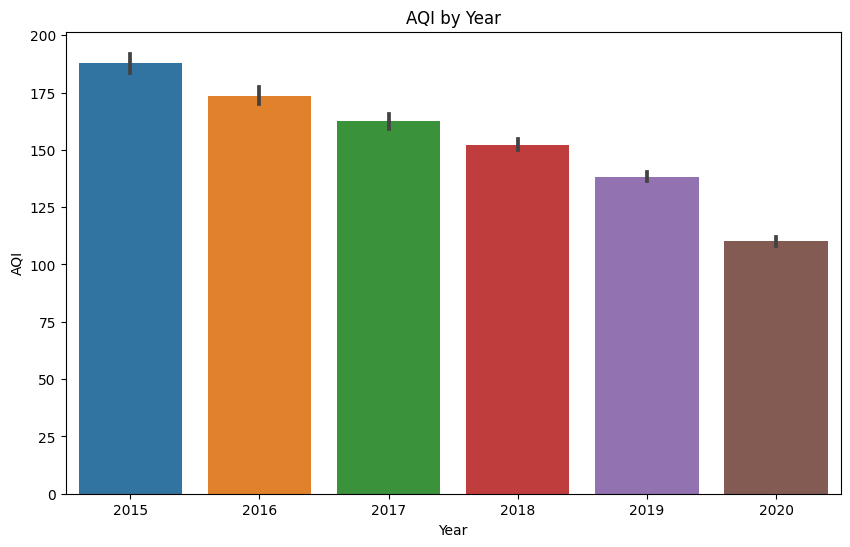

In [ ]:
# Create a bar plot of mean AQI by Year
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='AQI', data=df_full_clsf)

# Title and labels
plt.title('AQI by Year')
plt.xlabel('Year')
plt.ylabel('AQI')

# Display the plot
plt.show()

The line graph below is a graph showing the monthly averages of numerical values of the city_day data set. According to the fluctuations seen here, it can be said that the values ​​​​change according to certain seasonality.

It is seen that December and January matches with the winter months. It can be said that the AQI value increases as a result use of fuels such as coal, wood, heating and vehicles.

The fact that June and July coincide with the Monsoon period provides an opportunity for the air to disperse and clean due to the increase in rainfall and winds. For this reason, it can be said that the AQI value decreases and air quality increases.

PS: city_day data used for the below graph. This is just to show the AQI for certain months.

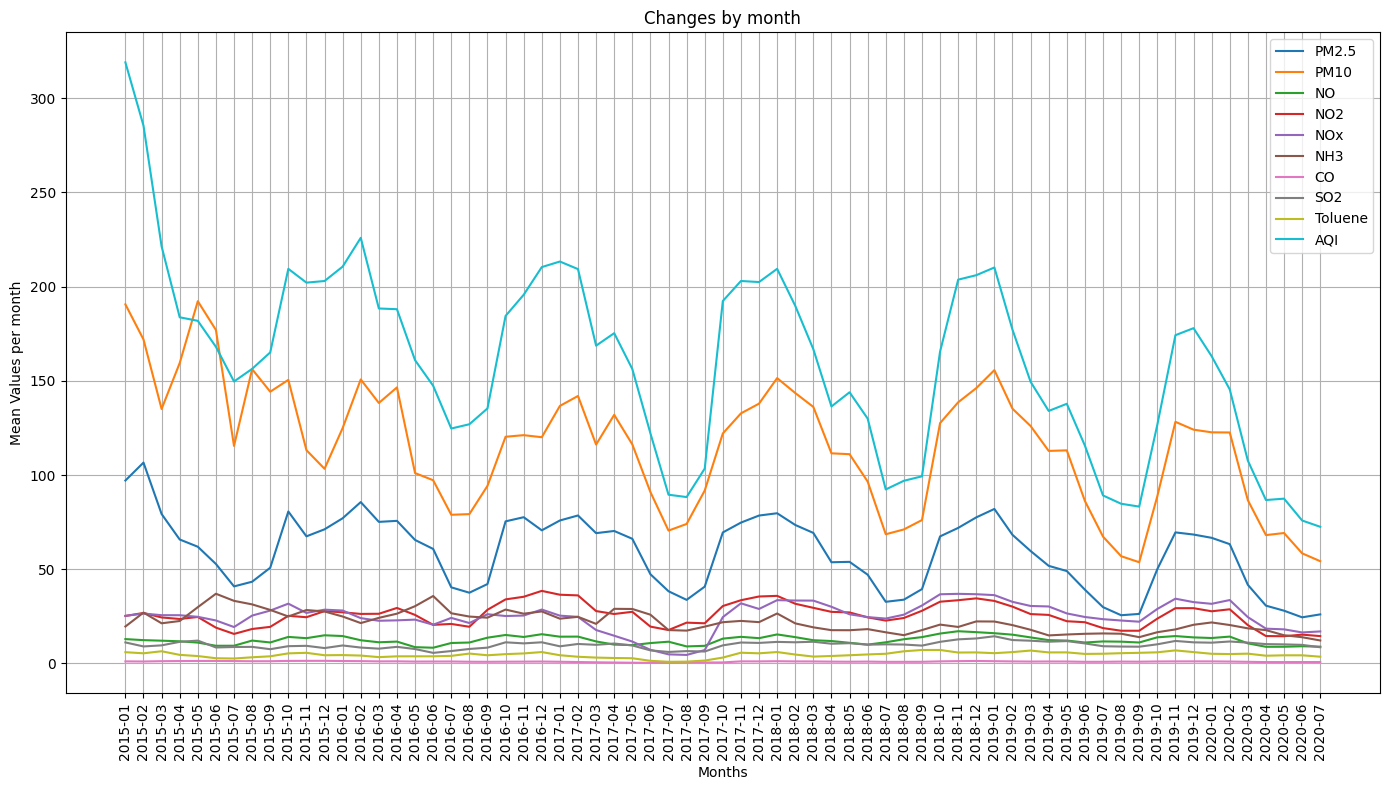

In [ ]:
# create a new data set to group the numerical columms
numerical_cols = df_city_day.select_dtypes(include='number').columns.tolist()


# set a new column for the months from Date column
# Use the original data for ilustration
df_city_day.loc[:,'Month'] = df_city_day['Date'].dt.to_period('M') # tranfer the months
monthly_data = df_city_day.groupby('Month')[numerical_cols].mean(numeric_only=True) # all numericall columns mean per month

plt.figure(figsize=(14, 8))
for col in numerical_cols:
    plt.plot(monthly_data.index.astype(str), monthly_data[col], label=col)

plt.xlabel('Months')
plt.ylabel('Mean Values per month')
plt.title('Changes by month')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The graph below is showing the monthly averages of the AQI value. AQI value reaches the highest level in December-January and the lowest level in June-July. It can be said that seasons effects the AQI.

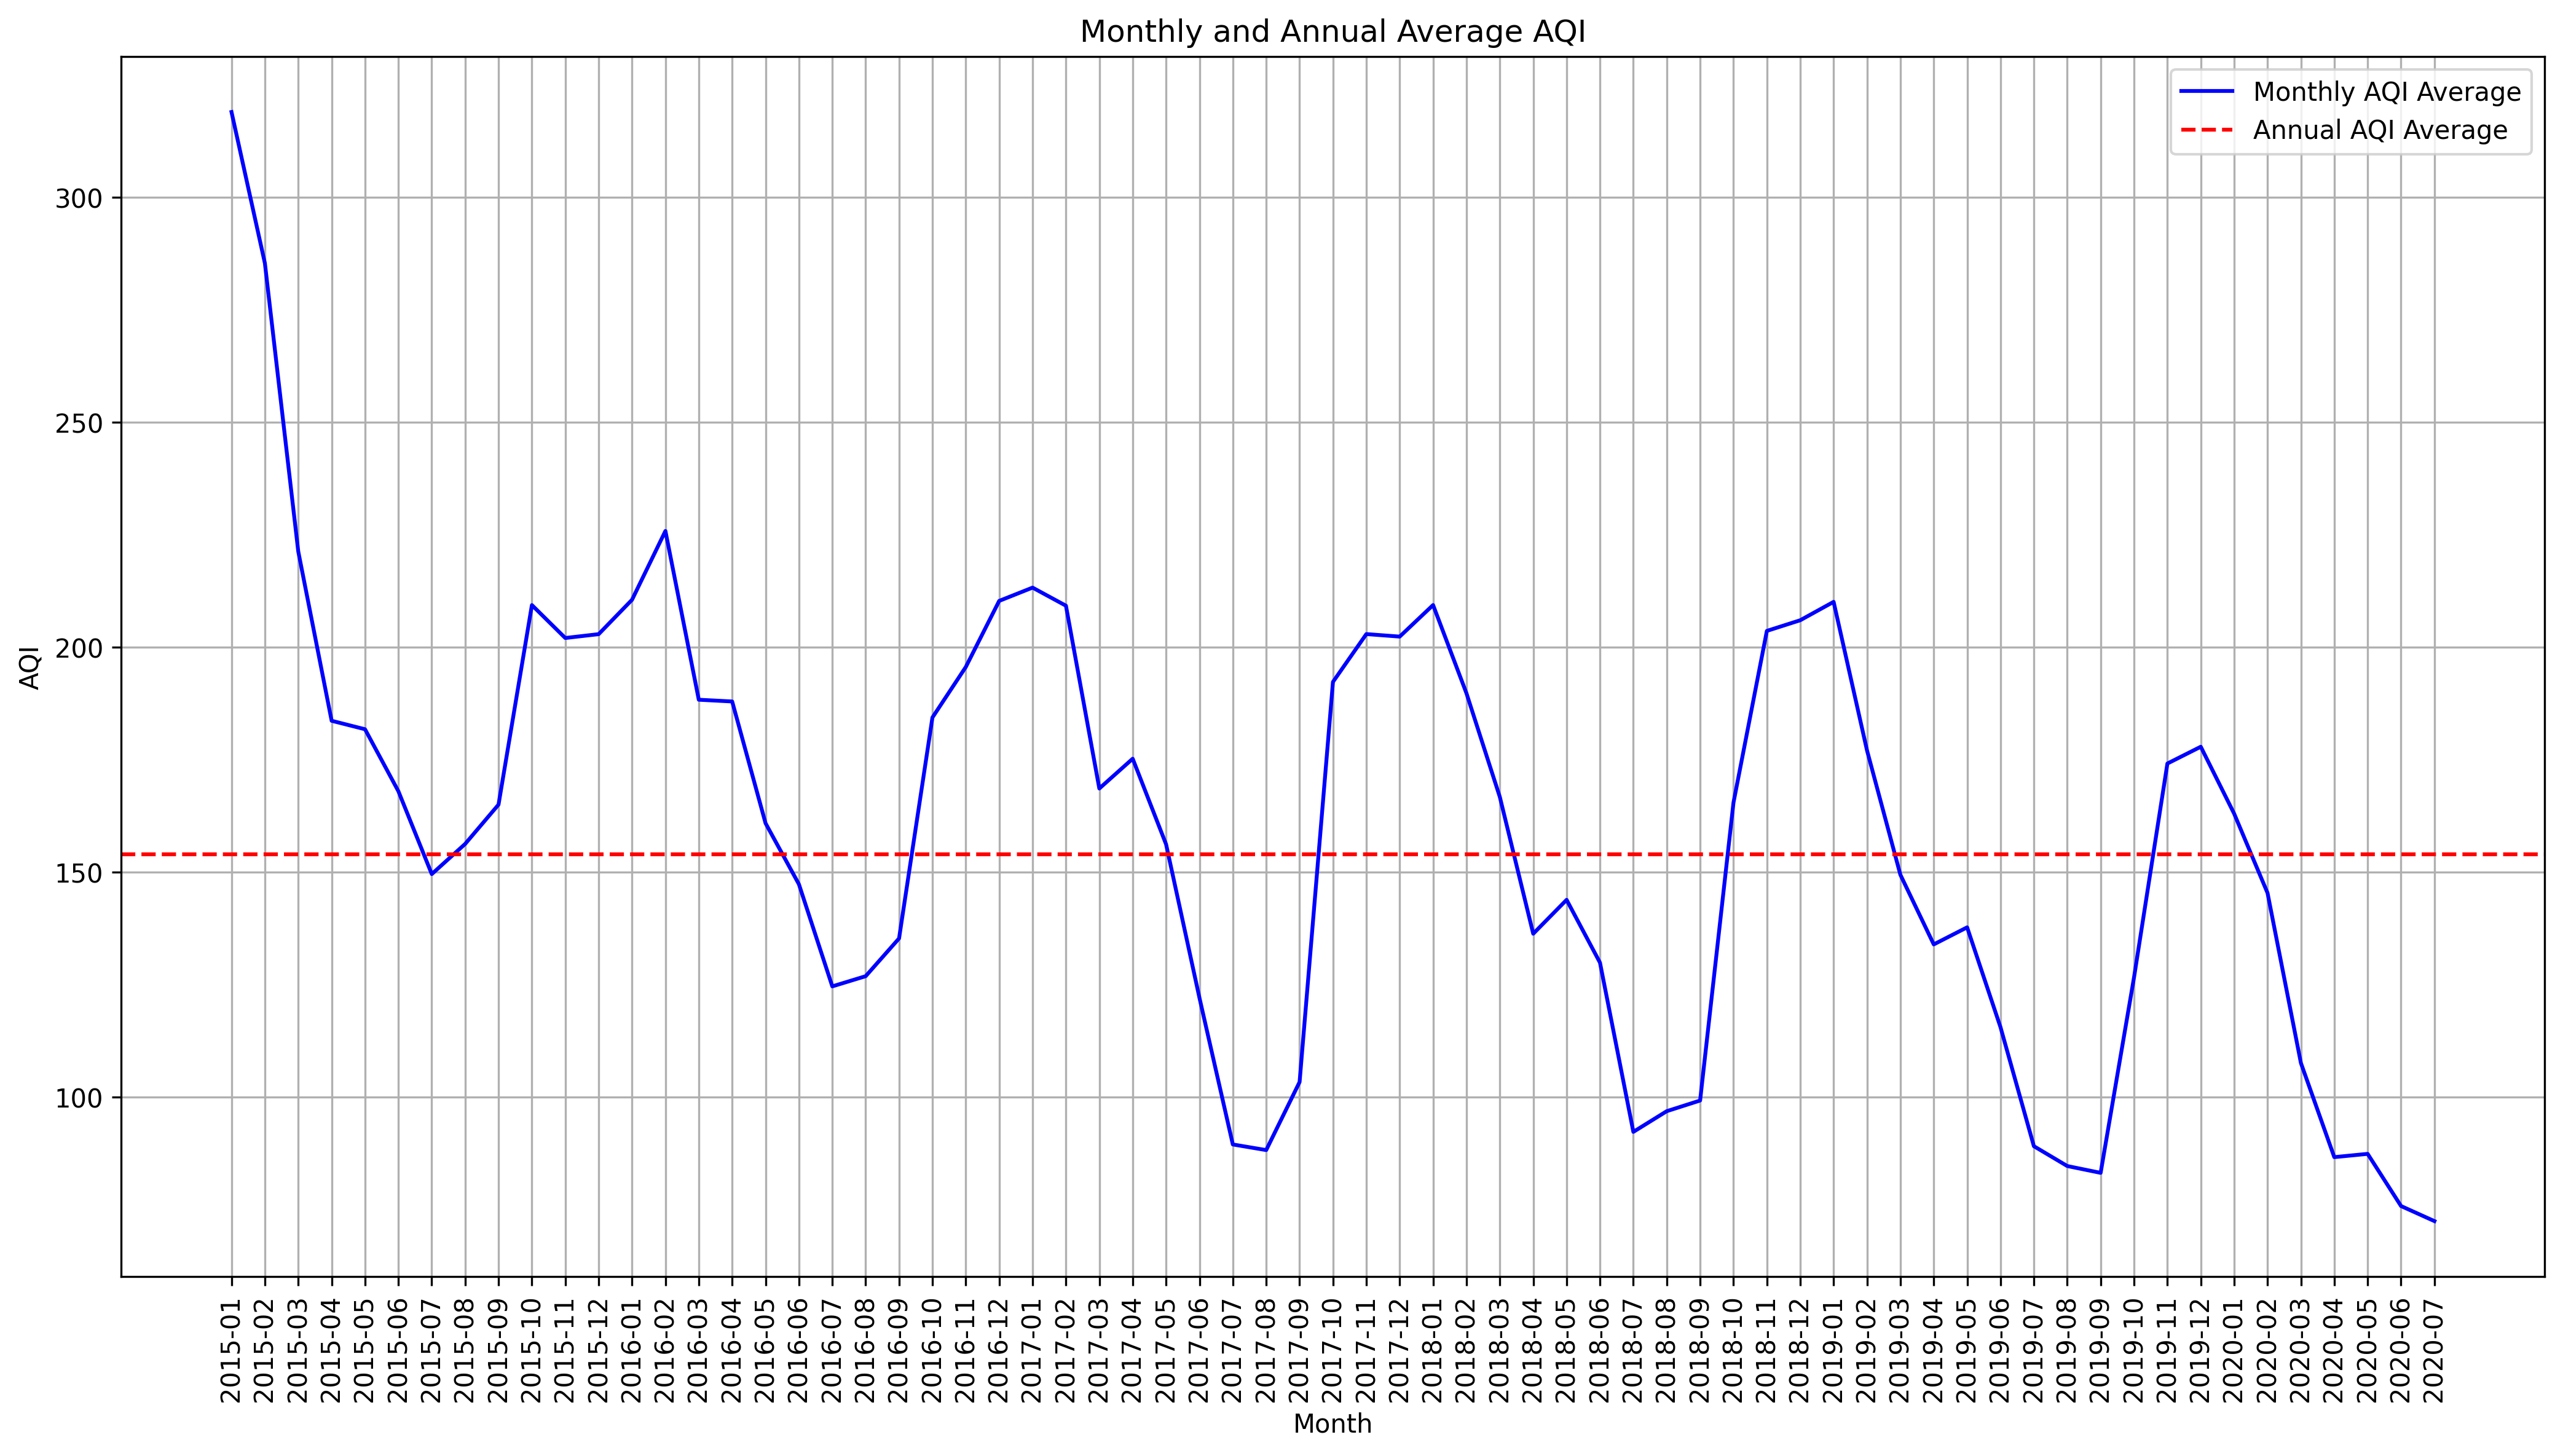

In [ ]:
# re create the Month and Year for the city_days, as we set the year for the df_full data set
df_city_day['Month'] = df_city_day['Date'].dt.to_period('M')
df_city_day['Year'] = df_city_day['Date'].dt.year

monthly_aqi = df_city_day.groupby('Month')['AQI'].mean() # calculate the month mean

annual_aqi_mean = df_city_day.groupby('Year')['AQI'].mean() # calculate the year mean

# Set the plot size
plt.figure(figsize=(14, 8), dpi=300)

plt.plot(monthly_aqi.index.astype(str), monthly_aqi, color='blue', label='Monthly AQI Average')

plt.axhline(y=annual_aqi_mean.mean(), linestyle='--', color='red', label='Annual AQI Average')

plt.xlabel('Month')
plt.ylabel('AQI')
plt.title('Monthly and Annual Average AQI')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In the pie charts below, the distribution of the top eight cities with high air pollution and the AQI value, as well as the independent variables that affect the AQI value the most, is shown separately by city.

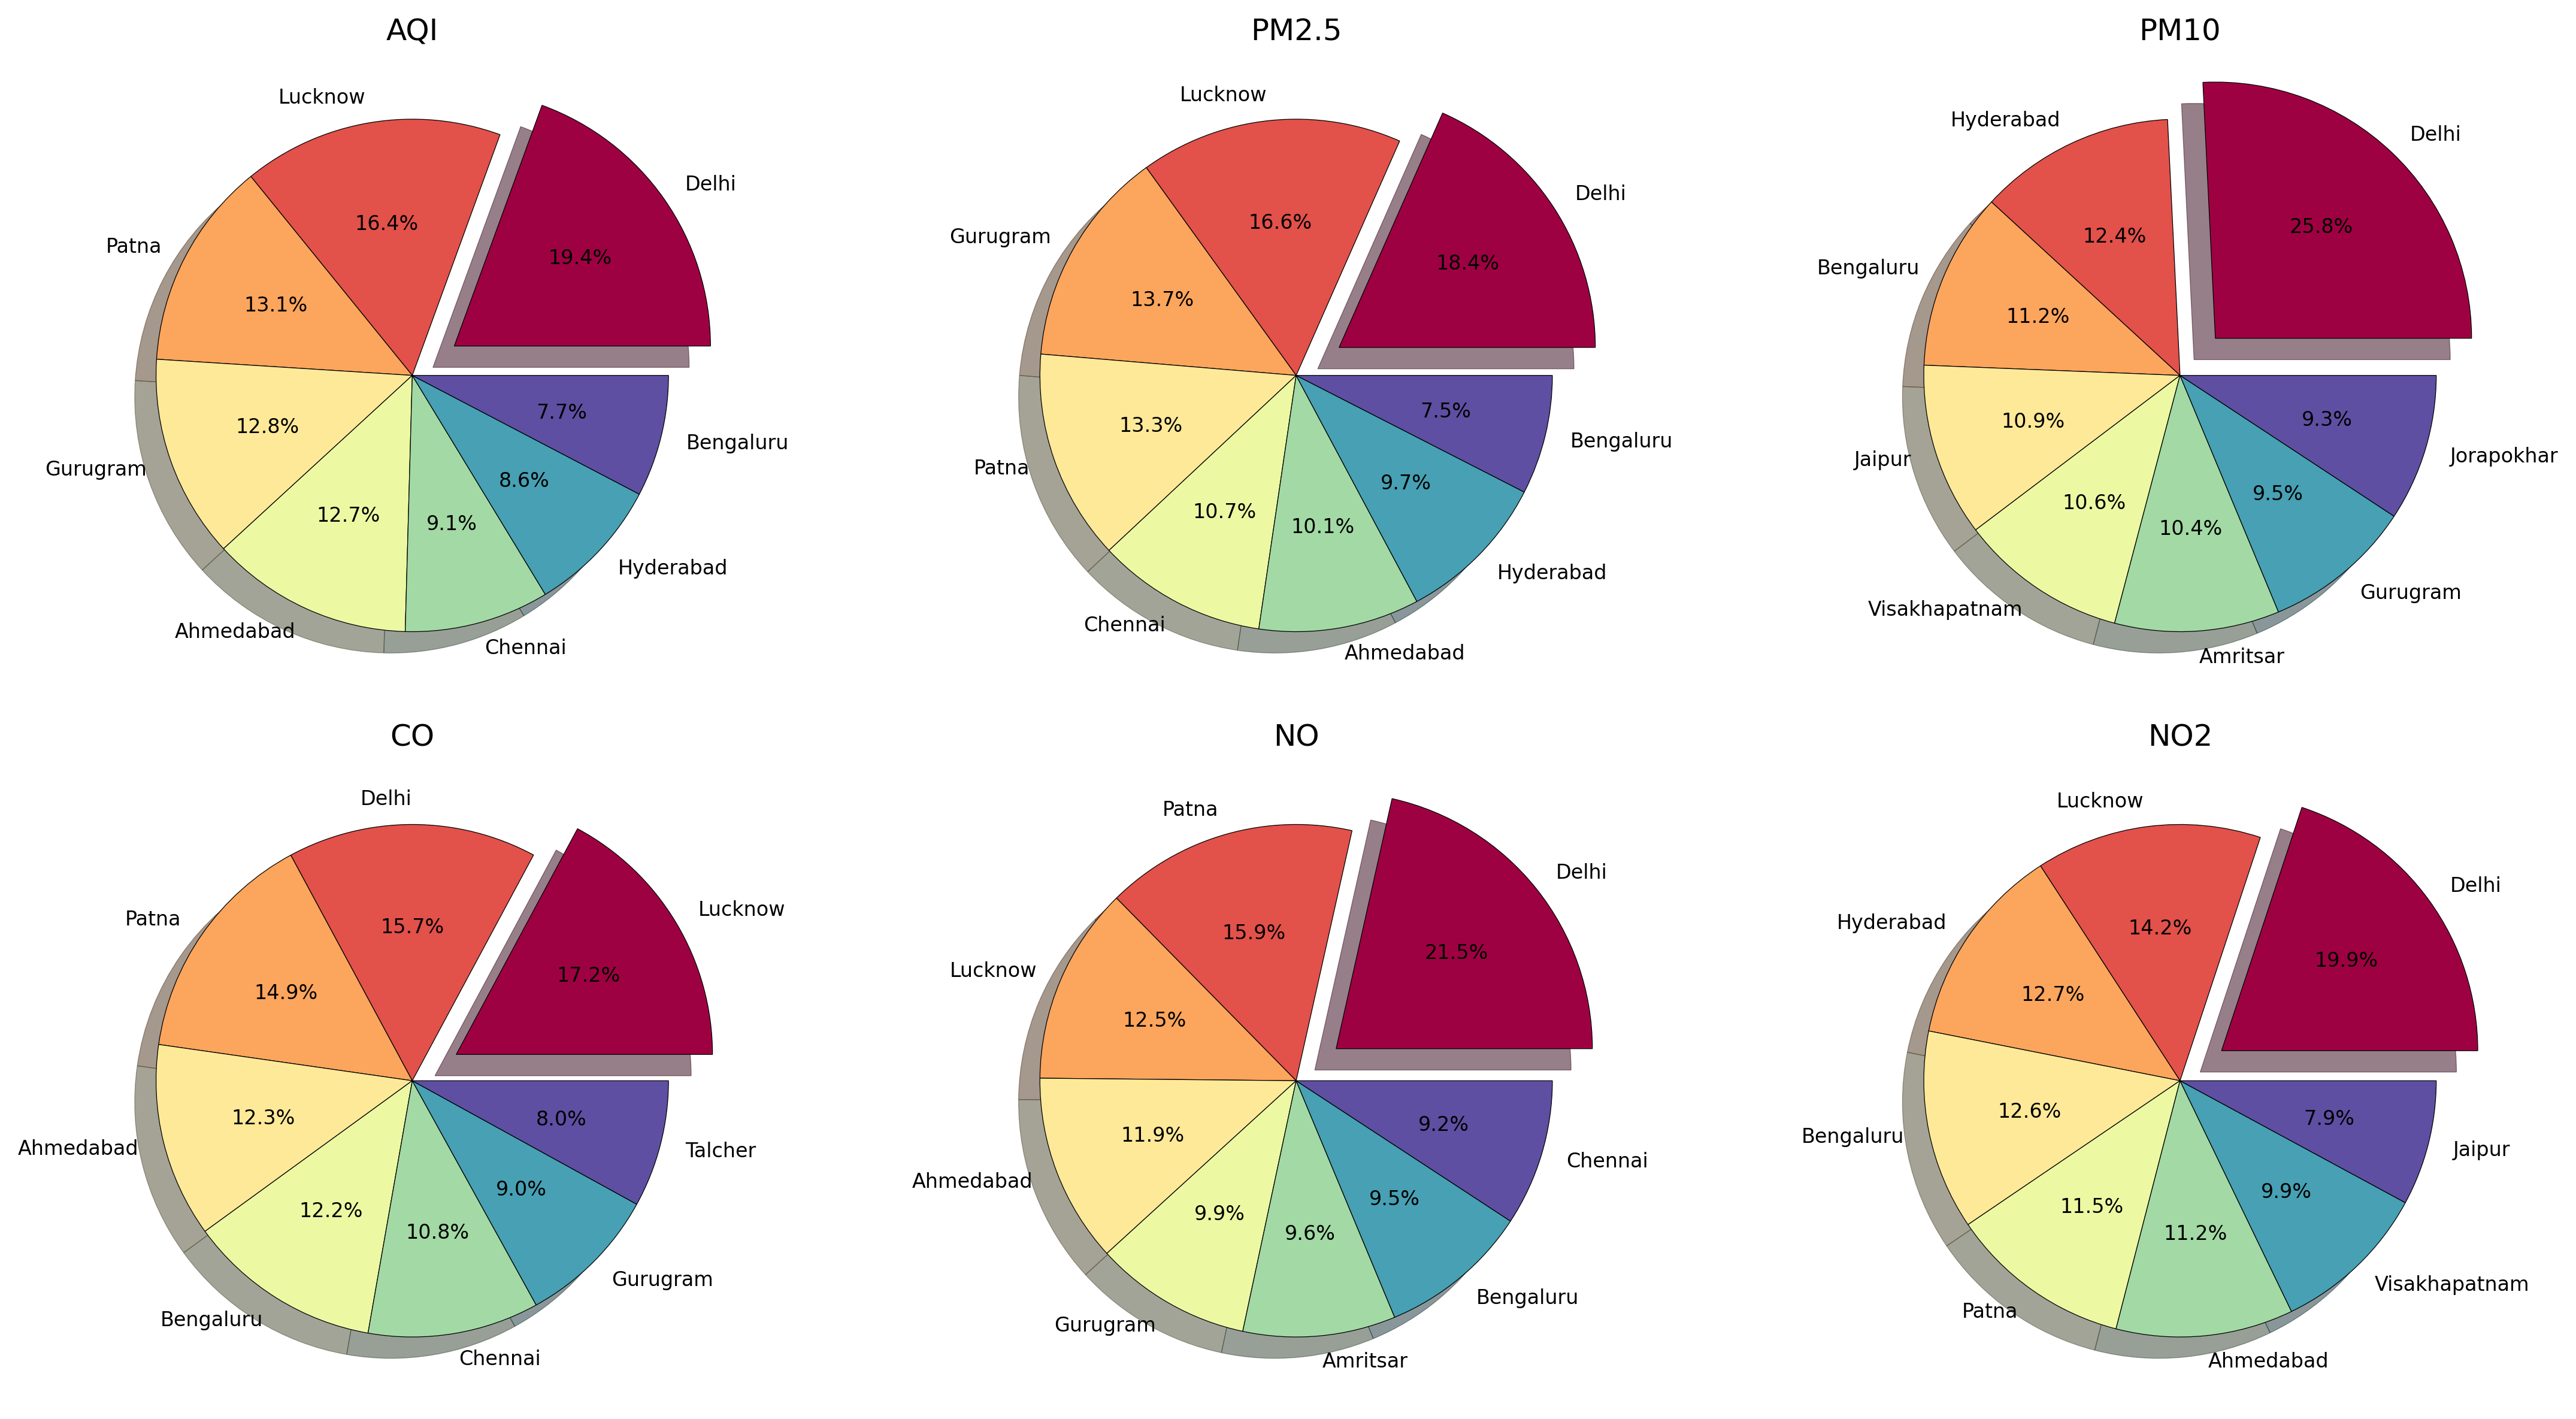

In [ ]:
# For Ilustration use the original data and for
# most effective gases for AQI
cols = ['AQI', 'PM2.5', 'PM10', 'CO', 'NO', 'NO2']

# create a pie chart
cmap = plt.get_cmap('Spectral')
color = [cmap(i) for i in np.linspace(0, 1, 8)]
explode = [0.2, 0, 0, 0, 0, 0, 0, 0]

# fit multiple charts in the display
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), dpi=300)

axes = axes.flatten()

# loop around all gasses for each city
for ax, col in zip(axes, cols):
    # Group the cities and select the 8 cities with the highest total
    x = df_city_day.groupby('City')[col].sum().sort_values(ascending=False)
    x = x.reset_index('City')

    top_cities = x[:8]
    sizes = top_cities[col].values
    labels = top_cities['City'].tolist()

    # set the pie chart
    wedges, texts, autotexts = ax.pie(sizes, shadow=True, autopct='%1.1f%%',
                                      colors=color, explode=explode,
                                      wedgeprops={'edgecolor': 'black', 'linewidth': 0.3},
                                      labels=labels)

    for text in texts:
        text.set_fontsize(8)

    for autotext in autotexts:
        autotext.set_fontsize(8)

    ax.set_title(f'{col}')

for i in range(len(cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In the bar graphs here, the values of the variables PM2.5 and CO, which are the two values that affect the AQI values of each city in the data.

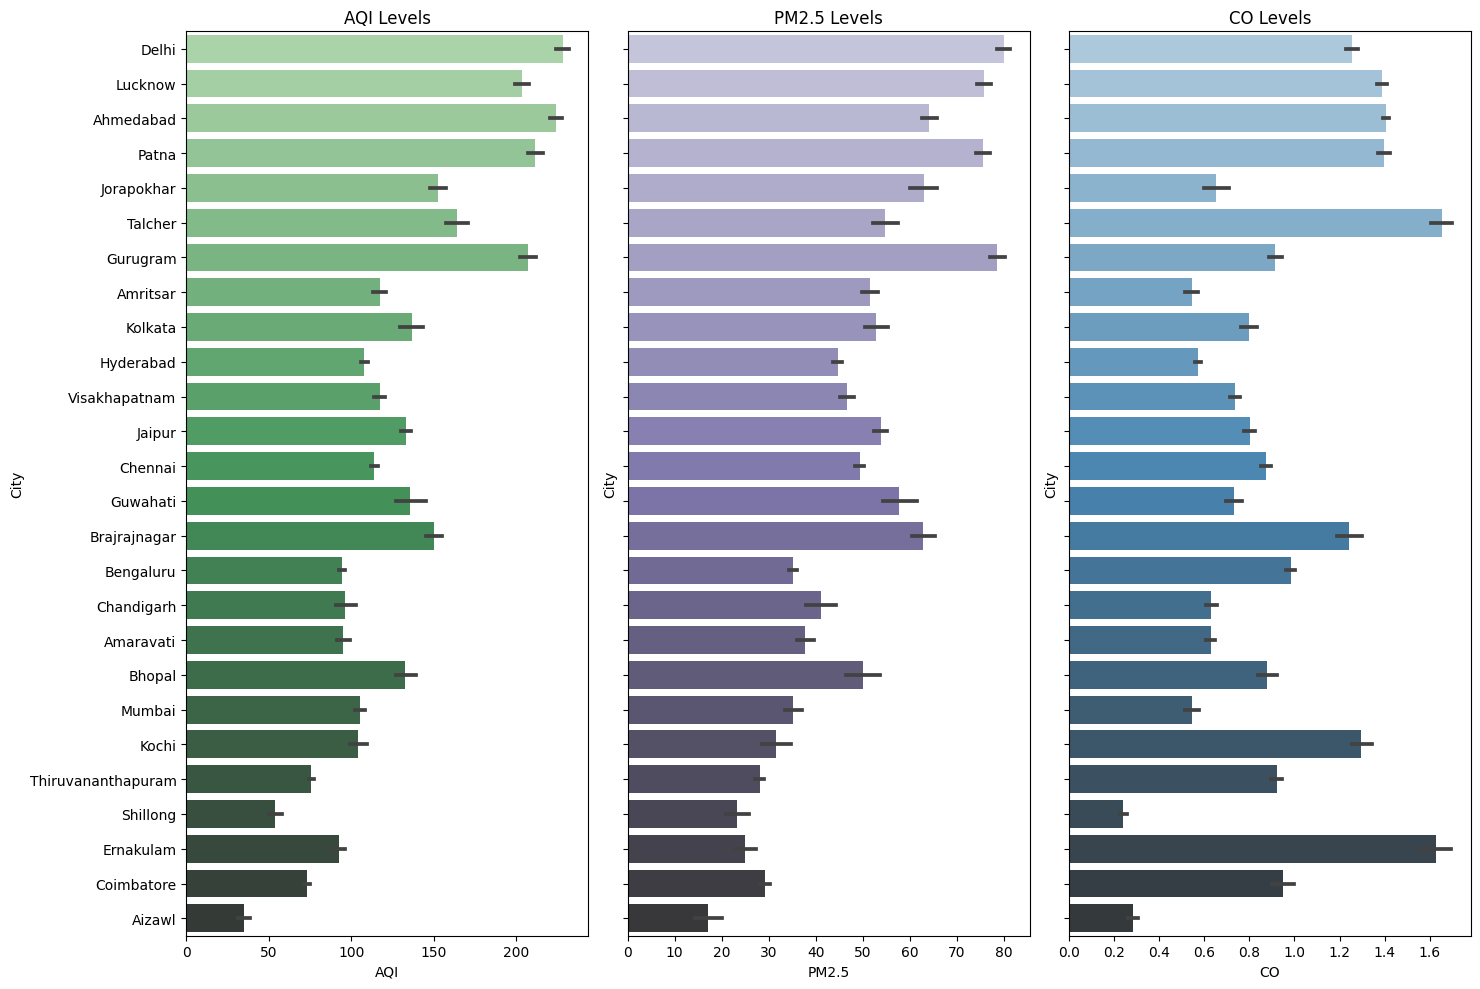

In [ ]:
# Set the display
fig, axes = plt.subplots(1, 3, figsize=(15, 10), sharey=True)

# Sort the data by AQI in ascending order
df_city_day_sorted = df_city_day.sort_values(by='AQI', ascending=False)

# Plot using the sorted data
sns.barplot(ax=axes[0], y='City', x='AQI', data=df_city_day_sorted, palette='Greens_d')
axes[0].set_title('AQI Levels')


sns.barplot(ax=axes[1], y='City', x='PM2.5', data=df_city_day_sorted, palette='Purples_d')
axes[1].set_title('PM2.5 Levels')

sns.barplot(ax=axes[2], y='City', x='CO', data=df_city_day_sorted, palette='Blues_d')
axes[2].set_title('CO Levels')

plt.tight_layout()
plt.show()

**PREPARING THE DATA**
- Determining the numerical and categorical columns of the data set,
- Filling the empty values with scaler, applying one-hot encoding to categorical data,
- For ML > Separating the data set into training, test and validation data sets,
- Determining the input and target columns of the data sets for normalisation and scailing


In [ ]:
# Missing values in AQI and AQI_Bucket and outliers removed from the data sets
# List the names of the numeric columns in df_full as a list to numeric_cols.
# Numerical columns are the same for all data sets
numeric_cols = df_full.select_dtypes(include=np.number).columns.tolist() # The numerical columns will be same for the df_full_clsf data set
numeric_cols

['PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'Toluene',
 'AQI',
 'Year']

In [ ]:
# the column typs can be seen here
#df_full.info()
df_full_clsf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24850 entries, 10229 to 29530
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        24850 non-null  object        
 1   Date        24850 non-null  datetime64[ns]
 2   PM2.5       24172 non-null  float64       
 3   PM10        17764 non-null  float64       
 4   NO          24463 non-null  float64       
 5   NO2         24459 non-null  float64       
 6   NOx         22993 non-null  float64       
 7   NH3         18314 non-null  float64       
 8   CO          24405 non-null  float64       
 9   SO2         24245 non-null  float64       
 10  Toluene     19024 non-null  float64       
 11  AQI         24850 non-null  float64       
 12  AQI_Bucket  24850 non-null  object        
 13  Year        24850 non-null  int32         
 14  Month       24850 non-null  int32         
dtypes: datetime64[ns](1), float64(10), int32(2), object(2)
memory usage: 2.

In [ ]:
# Now list the categorical columns in the df_full as categorical_cols. only the objects >> City, ignoring the Date data type
categorical_cols = df_full.select_dtypes(include=['object']).columns.tolist()
categorical_cols


['City']

In [ ]:
# Now list the categorical columns in the WEKA data
categorical_cols_clsf = df_full_clsf.select_dtypes(include=['object']).columns.tolist() # for classification data set
categorical_cols_clsf

['City', 'AQI_Bucket']

In [ ]:
# the list of all the columns in the df_full data set ( objects and the numerical data) for ML use later
full_columns=df_full.columns
#full_columns
df_full_clsf.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'Toluene', 'AQI', 'AQI_Bucket', 'Year', 'Month'],
      dtype='object')

In [ ]:
# Assigned to input_cols by removing the AQI and Date column. As the AQI will be the results for the regression learning and Date has already been spit and Year column created
input_cols = [full_columns[0]]+list(full_columns[2:-3])+ list(full_columns[-2:])
# Set a new target_col as AQI.
target_col = 'AQI'

In [ ]:
# check the all input columns where will be used for ML
input_cols

['City',
 'PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'AQI',
 'Year']

**Split the dataset for ML**

In [ ]:
# import the ML library for split the data for training, testing and validation
from sklearn.model_selection import train_test_split
# Split the df_full with the same 20% test size ( Random_state allow us to use the same test set)

train_and_val_df, test_df = train_test_split(df_full, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(df_full, test_size=0.2)


print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)


train_df.shape : (19880, 13)
val_df.shape : (4970, 13)
test_df.shape : (4970, 13)


In [ ]:
#List the top 5 row for the taining data set
train_df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,Year
11290,Delhi,2017-11-27,80.59,149.745,19.95,68.93,40.1275,52.50,1.64,18.95,13.04,382.0,2017
13231,Gurugram,2018-03-07,53.53,132.160,11.77,49.61,38.7200,NaN,1.02,1.66,NaN,165.0,2018
25199,Patna,2019-01-26,80.59,NaN,15.48,33.82,18.1500,NaN,1.17,15.22,20.65,352.0,2019
29021,Visakhapatnam,2019-02-08,98.90,221.690,19.95,63.54,67.6300,21.33,1.15,18.30,5.86,277.0,2019
19727,Kolkata,2020-03-05,34.26,71.620,15.34,33.77,49.1300,25.91,0.68,9.30,14.45,89.0,2020


In [ ]:
# list the top 5 validation data set
val_df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,Year
15896,Hyderabad,2018-08-11,16.39,29.84,7.35,24.46,18.46,16.95,0.28,6.09,5.23,43.0,2018
20797,Lucknow,2017-08-09,42.18,NaN,15.98,17.26,NaN,NaN,1.68,7.82,3.10,70.0,2017
13713,Gurugram,2019-07-02,93.12,277.55,17.81,21.77,24.91,NaN,0.56,10.52,6.02,196.0,2019
8343,Chennai,2016-05-24,50.24,NaN,4.84,19.87,15.43,30.02,1.09,4.30,6.74,91.0,2016
25198,Patna,2019-01-25,80.59,NaN,19.95,37.62,57.49,NaN,1.62,15.22,9.15,345.0,2019


In [ ]:
# list the test data set
test_df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,Year
11286,Delhi,2017-11-23,80.59,251.23,34.73,55.04,70.15,40.03,1.55,18.32,11.97,340.0,2017
27868,Thiruvananthapuram,2019-12-14,17.89,42.06,8.57,14.27,14.52,9.53,1.30,8.33,NaN,78.0,2019
28109,Visakhapatnam,2016-08-10,23.77,96.36,18.46,33.73,30.20,13.62,1.09,15.22,9.36,101.0,2016
26662,Talcher,2019-09-11,30.58,83.52,40.31,6.79,41.69,8.29,1.24,15.22,NaN,76.0,2019
3109,Amritsar,2017-04-04,40.64,63.97,8.88,27.46,NaN,16.51,0.00,2.64,NaN,76.0,2017


In [ ]:
# Now split the each data set by input( all the columns where the ML will run) and target (AQI) data sets
train_inputs = train_df[input_cols].copy()# Copied the input_cols columns from the train_df DataFrame and assigned them to train_inputs
train_target = train_df[target_col].copy() # Copied the target_col columns from the train_df DataFrame and assigned them to train_target
val_inputs = val_df[input_cols].copy()
val_target = val_df[target_col].copy()
test_inputs = test_df[input_cols].copy()
test_target = test_df[target_col].copy()

In [ ]:
# List the training data set
train_inputs.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,AQI,Year
11290,Delhi,80.59,149.745,19.95,68.93,40.1275,52.50,1.64,18.95,382.0,2017
13231,Gurugram,53.53,132.160,11.77,49.61,38.7200,NaN,1.02,1.66,165.0,2018
25199,Patna,80.59,NaN,15.48,33.82,18.1500,NaN,1.17,15.22,352.0,2019
29021,Visakhapatnam,98.90,221.690,19.95,63.54,67.6300,21.33,1.15,18.30,277.0,2019
19727,Kolkata,34.26,71.620,15.34,33.77,49.1300,25.91,0.68,9.30,89.0,2020


In [ ]:
# List the target data set in this case the AQI
train_target.head()

11290    382.0
13231    165.0
25199    352.0
29021    277.0
19727     89.0
Name: AQI, dtype: float64

**WEKA EXPORT PREPARETION**

In [ ]:
# For WEKA, set a new data set
df_weka = df_full_clsf.copy()
print('WEKA Shape :', df_weka.shape)

WEKA Shape : (24850, 15)


In [ ]:
# print WEKA data
df_weka.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,AQI_Bucket,Year,Month
10229,Delhi,2015-01-01,80.59,149.745,19.95,36.39,40.1275,33.85,1.45,9.25,9.15,208.0,Severe,2015,1
10230,Delhi,2015-01-02,80.59,269.550,19.95,32.87,40.1275,31.83,1.45,6.65,20.09,208.0,Severe,2015,1
10231,Delhi,2015-01-03,87.18,131.900,25.73,30.31,47.9500,30.02,1.45,2.65,10.23,143.0,Moderate,2015,1
10232,Delhi,2015-01-04,151.84,241.840,25.01,36.91,48.6200,30.02,1.45,4.63,9.71,319.0,Very Poor,2015,1
10233,Delhi,2015-01-05,146.60,219.130,14.01,34.92,38.2500,30.02,1.45,3.33,6.21,325.0,Very Poor,2015,1


## Missing Values

In [ ]:
# re-aline the columns from the training imput dataset for numerical and categorical data sets
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
numeric_cols



['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'AQI', 'Year']

In [ ]:
#Check the columns in df_weka
full_weka_columns = df_weka.columns
full_weka_columns


Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'Toluene', 'AQI', 'AQI_Bucket', 'Year', 'Month'],
      dtype='object')

In [ ]:
#As the date not needed anymore,, it can be removed (dropped)
input_cols_weka = [full_weka_columns[0]]+list(full_weka_columns[2:])
input_cols_weka

['City',
 'PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'Toluene',
 'AQI',
 'AQI_Bucket',
 'Year',
 'Month']

In [ ]:
# create a new data set for df_weka without the date
df_weka_clr = df_weka[input_cols_weka].copy()

In [ ]:
#check that date is now removed in the new data set
df_weka_clr.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,AQI_Bucket,Year,Month
10229,Delhi,80.59,149.745,19.95,36.39,40.1275,33.85,1.45,9.25,9.15,208.0,Severe,2015,1
10230,Delhi,80.59,269.550,19.95,32.87,40.1275,31.83,1.45,6.65,20.09,208.0,Severe,2015,1
10231,Delhi,87.18,131.900,25.73,30.31,47.9500,30.02,1.45,2.65,10.23,143.0,Moderate,2015,1
10232,Delhi,151.84,241.840,25.01,36.91,48.6200,30.02,1.45,4.63,9.71,319.0,Very Poor,2015,1
10233,Delhi,146.60,219.130,14.01,34.92,38.2500,30.02,1.45,3.33,6.21,325.0,Very Poor,2015,1


In [ ]:
# re-aline the columns from the weka dataset for numerical and categorical data sets
numeric_cols_weka = df_weka.select_dtypes(include=np.number).columns.tolist()
numeric_cols_weka

['PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'Toluene',
 'AQI',
 'Year',
 'Month']

In [ ]:
# re-aline the columns from the training imput dataset for numerical and categorical data sets
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()
categorical_cols

['City']

In [ ]:
# re-aline the columns from the training imput dataset for numerical and categorical data sets
categorical_cols_weka = df_weka.select_dtypes('object').columns.tolist()
categorical_cols_weka

['City', 'AQI_Bucket']

In [ ]:
# Let's see the df_weka data set details
df_weka_clr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24850 entries, 10229 to 29530
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        24850 non-null  object 
 1   PM2.5       24172 non-null  float64
 2   PM10        17764 non-null  float64
 3   NO          24463 non-null  float64
 4   NO2         24459 non-null  float64
 5   NOx         22993 non-null  float64
 6   NH3         18314 non-null  float64
 7   CO          24405 non-null  float64
 8   SO2         24245 non-null  float64
 9   Toluene     19024 non-null  float64
 10  AQI         24850 non-null  float64
 11  AQI_Bucket  24850 non-null  object 
 12  Year        24850 non-null  int32  
 13  Month       24850 non-null  int32  
dtypes: float64(10), int32(2), object(2)
memory usage: 2.7+ MB


Now some of the steps must be duplicated for regresssion and classification data set preparetion

In [ ]:
# import the SimpleImputer library to fill out the missing values in the df_full with the mean of the columns
from sklearn.impute import SimpleImputer
imputer =  SimpleImputer(strategy = 'mean')
# set the mean value calculation with the only numerical columns- as seen above
imputer.fit(df_full[numeric_cols])

SimpleImputer()

In [ ]:
# The transform method transforms the missing values in the training, test and validation sets using the mean values se above.
# fill all the missing data with mean in each column for only numerical values
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [ ]:
# Let's see the result. Are there any NULL values?
# un-hash to see the resutls
train_inputs[numeric_cols].isna().sum()
#val_inputs[numeric_cols].isna().sum()
#test_inputs[numeric_cols].isna().sum()

PM2.5    0
PM10     0
NO       0
NO2      0
NOx      0
NH3      0
CO       0
SO2      0
AQI      0
Year     0
dtype: int64

**Now for WEKA**

In [ ]:
# What are the NULL values in the WEKA data?
df_weka_clr[numeric_cols_weka].isna().sum()

PM2.5       678
PM10       7086
NO          387
NO2         391
NOx        1857
NH3        6536
CO          445
SO2         605
Toluene    5826
AQI           0
Year          0
Month         0
dtype: int64

In [ ]:
# import the SimpleImputer library to fill out the missing values in the df_full with the mean of the columns
from sklearn.impute import SimpleImputer
imputer =  SimpleImputer(strategy = 'mean')
# set the mean value calculation with the only numerical columns- as seen above the
imputer.fit(df_full_clsf[numeric_cols_weka])



SimpleImputer()

In [ ]:
# The transform method transforms the missing values in the training, test and validation sets using the mean values se above.
# fill all the missing data with mean in each column for only numerical values
df_weka_clr[numeric_cols_weka] = imputer.transform(df_weka_clr[numeric_cols_weka])



In [ ]:
# Let's see the result. Are there any NULL values?
df_weka_clr[numeric_cols_weka].isna().sum()

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
Toluene    0
AQI        0
Year       0
Month      0
dtype: int64

In [ ]:
# What is the data sets look like now
# un-hash for different options
df_weka_clr.head()
#train_inputs.head()
#val_inputs.head()
#test_inputs.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,AQI_Bucket,Year,Month
10229,Delhi,80.59,149.745,19.95,36.39,40.1275,33.85,1.45,9.25,9.15,208.0,Severe,2015.0,1.0
10230,Delhi,80.59,269.550,19.95,32.87,40.1275,31.83,1.45,6.65,20.09,208.0,Severe,2015.0,1.0
10231,Delhi,87.18,131.900,25.73,30.31,47.9500,30.02,1.45,2.65,10.23,143.0,Moderate,2015.0,1.0
10232,Delhi,151.84,241.840,25.01,36.91,48.6200,30.02,1.45,4.63,9.71,319.0,Very Poor,2015.0,1.0
10233,Delhi,146.60,219.130,14.01,34.92,38.2500,30.02,1.45,3.33,6.21,325.0,Very Poor,2015.0,1.0


In [ ]:
# Now that there are no NULL values, the full data set can be Extracted with the mean data sets values
extract = pd.DataFrame(df_weka_clr)
extract.to_csv('/kaggle/working/AQI_India_weka_non_null.csv',index=False)

## Scaling the data with StandardScaler library.
`StandardScaler` from `sklearn.preprocessing` is a tool used to standardize features in a dataset. It scales the data so that each feature has:

- Mean = 0
- Standard deviation = 1

This is done by transforming the data in such a way that it follows a standard normal distribution. The formula used by `StandardScaler` for each feature (or column) in the dataset is:

z=(x−μ)/σ

Where:
- x is the original value.
- μ is the mean of the feature.
- σ is the standard deviation of the feature.

### Why use `StandardScaler`?
1. **Normalization for ML models**: Many machine learning algorithms, especially those that rely on distance measurements (like K-Nearest Neighbors or support vector machines) or gradient-based methods (like logistic regression or neural networks), work better when features are on the same scale.
2. **Improving convergence**: Standardizing features can help in optimizing algorithms, making training faster and improving convergence for models like gradient descent-based optimization.
3. **Interpretable results**: After standardization, features can be more comparable if they have different units or ranges.

### Example:
```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
```

After applying the `fit_transform` method, `scaled_data` will have mean 0 and standard deviation 1 for each feature.


In [ ]:
# before Scaling
#test_inputs.describe().T
df_weka_clr.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24850.0,55.176151,32.326125,0.04,29.56,50.165000,79.5075,158.21
PM10,24850.0,105.313445,50.912192,0.03,71.78,105.313445,122.9575,289.95
NO,24850.0,12.498769,8.855479,0.03,5.72,10.075000,19.7100,41.43
NO2,24850.0,25.824119,16.629017,0.01,12.09,22.535000,37.6200,76.40
NOx,24850.0,26.776913,17.077590,0.00,14.03,25.720000,38.1700,81.06
NH3,24850.0,19.970777,11.875648,0.01,11.28,19.970777,24.7100,62.16
CO,24850.0,1.004985,0.574800,0.00,0.59,0.950000,1.4500,2.86
SO2,24850.0,10.326732,5.791480,0.01,5.79,9.430000,14.8900,29.54
Toluene,24850.0,5.202849,4.362159,0.00,1.58,5.202849,7.3800,21.95
AQI,24850.0,146.932032,87.421731,13.00,81.00,118.000000,208.0000,398.00


In [ ]:
# Let's see the data before scaling
df_weka_clr.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,AQI_Bucket,Year,Month
10229,Delhi,80.59,149.745,19.95,36.39,40.1275,33.85,1.45,9.25,9.15,208.0,Severe,2015.0,1.0
10230,Delhi,80.59,269.550,19.95,32.87,40.1275,31.83,1.45,6.65,20.09,208.0,Severe,2015.0,1.0
10231,Delhi,87.18,131.900,25.73,30.31,47.9500,30.02,1.45,2.65,10.23,143.0,Moderate,2015.0,1.0
10232,Delhi,151.84,241.840,25.01,36.91,48.6200,30.02,1.45,4.63,9.71,319.0,Very Poor,2015.0,1.0
10233,Delhi,146.60,219.130,14.01,34.92,38.2500,30.02,1.45,3.33,6.21,325.0,Very Poor,2015.0,1.0


The values are too high. So Scaling would reduce the spread of the values to a smaller gap for managable size.

In [ ]:
# Scale the data sets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train_inputs[numeric_cols]) # created a scaler object and fit it with training data set.
# Numerical columns in training, test and validation sets are standardized.
train_inputs[numeric_cols] = scaler.fit_transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.fit_transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.fit_transform(test_inputs[numeric_cols])

In [ ]:
# Now for WEKA
# Numerical columns are standardised.
df_weka_clr[numeric_cols_weka] = scaler.fit_transform(df_weka_clr[numeric_cols_weka])

In [ ]:
# after Scaling
#test_inputs.describe().T
df_weka_clr.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24850.0,-1.784220e-16,1.00002,-1.705656,-0.792445,-0.155022,0.752699,3.187389
PM10,24850.0,-1.715596e-16,1.00002,-2.067983,-0.658666,0.000000,0.346566,3.626642
NO,24850.0,1.566911e-16,1.00002,-1.408057,-0.765504,-0.273708,0.814341,3.267109
NO2,24850.0,3.202446e-17,1.00002,-1.552385,-0.825929,-0.197798,0.709370,3.041485
NOx,24850.0,7.777369e-17,1.00002,-1.567988,-0.746427,-0.061890,0.667150,3.178679
NH3,24850.0,2.287462e-17,1.00002,-1.680850,-0.731830,0.000000,0.399079,3.552654
CO,24850.0,4.918042e-17,1.00002,-1.748442,-0.721978,-0.095661,0.774225,3.227301
SO2,24850.0,-1.778501e-16,1.00002,-1.781399,-0.783362,-0.154840,0.787944,3.317572
Toluene,24850.0,1.504006e-16,1.00002,-1.192747,-0.830534,0.000000,0.499110,3.839266
AQI,24850.0,-6.176146e-17,1.00002,-1.532053,-0.754199,-0.330954,0.698559,2.871975


In [ ]:
# Let's see the data now
df_weka_clr.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,AQI_Bucket,Year,Month
10229,Delhi,0.786186,0.872727,0.841443,0.635401,0.781776,1.168736,0.774225,-0.185920,0.904880,0.698559,Severe,-2.08047,-1.536611
10230,Delhi,0.786186,3.225944,0.841443,0.423719,0.781776,0.998637,0.774225,-0.634865,3.412863,0.698559,Severe,-2.08047,-1.536611
10231,Delhi,0.990050,0.522215,1.494159,0.269768,1.239842,0.846221,0.774225,-1.325548,1.152469,-0.044979,Moderate,-2.08047,-1.536611
10232,Delhi,2.990330,2.681662,1.412852,0.666672,1.279075,0.846221,0.774225,-0.983660,1.033260,1.968291,Very Poor,-2.08047,-1.536611
10233,Delhi,2.828229,2.235591,0.170658,0.547000,0.671835,0.846221,0.774225,-1.208132,0.230888,2.036925,Very Poor,-2.08047,-1.536611


In [ ]:
extract = pd.DataFrame(df_weka_clr)
extract.to_csv('/kaggle/working/AQI_India_weka_scaled.csv',index=False)

### One-Hot Encoding
A one-hot encoding can be applied to the category representation. This is where the object ( city and date) encoded variable is removed and a new binary variable is added for each unique value.

For example; In the “color” variable example, there are 3 categories and therefore 3 binary variables are needed. A “1” value is placed in the binary variable for the color and “0” values for the other colors.

1, 0, 0  >> red

0, 1, 0  >> green

0, 0, 1  >> blue


The binary variables are often called “dummy variables” in other fields, such as statistics.

In [ ]:
# Find the total number of Cities in question
df_full[categorical_cols].nunique()

City    26
dtype: int64

In [ ]:
# import the one-hot encoder library for the encoding for City column only
from sklearn.preprocessing import OneHotEncoder
# created an encoder object. By default, sparse_output = True and the results are returned in a sparse format.
# If False is selected, a NumPy array is returned.
# handle_unknown = 'ignore' If unknown categories are encountered, no error is given and all zero values are assigned for these categories.
# This is same for WEKA data set
encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
encoder.fit(df_full[categorical_cols])# trained the encoder using the categorical columns in the df_full DataFrame.

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [ ]:
# list the unique city names as catagory objects
encoder.categories_


[array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
        'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
        'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
        'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
        'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
        'Visakhapatnam'], dtype=object)]

In [ ]:
# Now convert the city array into a list in the encoder.
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
encoded_cols

['City_Ahmedabad',
 'City_Aizawl',
 'City_Amaravati',
 'City_Amritsar',
 'City_Bengaluru',
 'City_Bhopal',
 'City_Brajrajnagar',
 'City_Chandigarh',
 'City_Chennai',
 'City_Coimbatore',
 'City_Delhi',
 'City_Ernakulam',
 'City_Gurugram',
 'City_Guwahati',
 'City_Hyderabad',
 'City_Jaipur',
 'City_Jorapokhar',
 'City_Kochi',
 'City_Kolkata',
 'City_Lucknow',
 'City_Mumbai',
 'City_Patna',
 'City_Shillong',
 'City_Talcher',
 'City_Thiruvananthapuram',
 'City_Visakhapatnam']

In [ ]:
# check the train data set. The Cities are still as an object and not encoded yet.
#train_inputs.head()
df_weka_clr.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,AQI_Bucket,Year,Month
10229,Delhi,0.786186,0.872727,0.841443,0.635401,0.781776,1.168736,0.774225,-0.185920,0.904880,0.698559,Severe,-2.08047,-1.536611
10230,Delhi,0.786186,3.225944,0.841443,0.423719,0.781776,0.998637,0.774225,-0.634865,3.412863,0.698559,Severe,-2.08047,-1.536611
10231,Delhi,0.990050,0.522215,1.494159,0.269768,1.239842,0.846221,0.774225,-1.325548,1.152469,-0.044979,Moderate,-2.08047,-1.536611
10232,Delhi,2.990330,2.681662,1.412852,0.666672,1.279075,0.846221,0.774225,-0.983660,1.033260,1.968291,Very Poor,-2.08047,-1.536611
10233,Delhi,2.828229,2.235591,0.170658,0.547000,0.671835,0.846221,0.774225,-1.208132,0.230888,2.036925,Very Poor,-2.08047,-1.536611


In [ ]:
# now with the One-hot encodes add all the categorical_cols(cities) columns to the datasets.
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [ ]:
# now for WEKA data set. use the df_full categorical columns as the AQI_Bucket does not need to be converted.
df_weka_clr[encoded_cols] = encoder.transform(df_weka_clr[categorical_cols])

In [ ]:
# now that 26 more columns ( cities) are added to data sets, if you need to see every city data, the table listign limitesions can be removed.
# "None" will be the number of colums to see aka ALL
pd.set_option('display.max_columns', None)

In [ ]:
#Let's see the new test_input dataset with all of the Cities are added
train_inputs.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,AQI,Year,City_Ahmedabad,City_Aizawl,City_Amaravati,City_Amritsar,City_Bengaluru,City_Bhopal,City_Brajrajnagar,City_Chandigarh,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Gurugram,City_Guwahati,City_Hyderabad,City_Jaipur,City_Jorapokhar,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam
11290,Delhi,0.781652,0.872134,0.830834,2.586404,0.775299,2.728789,1.095077,1.489028,2.676492,-0.727101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13231,Gurugram,-0.054288,0.526460,-0.088764,1.425058,0.693060,-0.002555,0.021558,-1.501386,0.201320,-0.052118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25199,Patna,0.781652,-0.001270,0.328315,0.475904,-0.508821,-0.002555,0.281280,0.843901,2.334303,0.622866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29021,Visakhapatnam,1.347287,2.286377,0.830834,2.262405,2.382238,0.111573,0.246651,1.376607,1.478828,0.622866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19727,Kolkata,-0.649579,-0.663592,0.312576,0.472898,1.301304,0.496136,-0.567146,-0.180000,-0.665561,1.297850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Let's see the new df_weka_clr dataset with all of the Cities are added
df_weka_clr.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,AQI_Bucket,Year,Month,City_Ahmedabad,City_Aizawl,City_Amaravati,City_Amritsar,City_Bengaluru,City_Bhopal,City_Brajrajnagar,City_Chandigarh,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Gurugram,City_Guwahati,City_Hyderabad,City_Jaipur,City_Jorapokhar,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam
10229,Delhi,0.786186,0.872727,0.841443,0.635401,0.781776,1.168736,0.774225,-0.185920,0.904880,0.698559,Severe,-2.08047,-1.536611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10230,Delhi,0.786186,3.225944,0.841443,0.423719,0.781776,0.998637,0.774225,-0.634865,3.412863,0.698559,Severe,-2.08047,-1.536611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10231,Delhi,0.990050,0.522215,1.494159,0.269768,1.239842,0.846221,0.774225,-1.325548,1.152469,-0.044979,Moderate,-2.08047,-1.536611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10232,Delhi,2.990330,2.681662,1.412852,0.666672,1.279075,0.846221,0.774225,-0.983660,1.033260,1.968291,Very Poor,-2.08047,-1.536611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10233,Delhi,2.828229,2.235591,0.170658,0.547000,0.671835,0.846221,0.774225,-1.208132,0.230888,2.036925,Very Poor,-2.08047,-1.536611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Now Let's see the data set info for WEKA data
df_weka_clr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24850 entries, 10229 to 29530
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City                     24850 non-null  object 
 1   PM2.5                    24850 non-null  float64
 2   PM10                     24850 non-null  float64
 3   NO                       24850 non-null  float64
 4   NO2                      24850 non-null  float64
 5   NOx                      24850 non-null  float64
 6   NH3                      24850 non-null  float64
 7   CO                       24850 non-null  float64
 8   SO2                      24850 non-null  float64
 9   Toluene                  24850 non-null  float64
 10  AQI                      24850 non-null  float64
 11  AQI_Bucket               24850 non-null  object 
 12  Year                     24850 non-null  float64
 13  Month                    24850 non-null  float64
 14  City_Ahmedabad         

Now that the data is ready for for WEKA, it can be extract as csv file to import in WEKA
as seen the objects columns City and AQI_Bucket is there, these can be dropped in WEKA for regresssion or classificate calculations where necessery

In [ ]:
extract = pd.DataFrame(df_weka_clr)
extract.to_csv('/kaggle/working/AQI_India_weka_onehot_full.csv',index=False)

**DATA MODELING**

Let's try the lineer regression for the feature sellected.
As we have the historical data and we know the AQI resutls this will be a better options for ML
Import a few libraries for this.

In [ ]:
#Import the lineer regression libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Test_input data set columns, as seen the City is in the dataset as Object
test_inputs.info()

In [ ]:
# Now combined the only numerical columns and one-hot encoded columns of the training, validation and test datasets. Removing the city (object ) column
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [ ]:
# as seen now, all the columns are now numerical columns
X_train.head()

**Fixed/Random Prediction**

- Let's define two models that always return the average and random values ​​as predictions.
- We can determine the minimum score that the models we will create with dumb models should achieve.




Let's break down the code below to explain what it does:

### Function `guess_mean`
```python
def guess_mean(inputs):
    return np.full(len(inputs), df_full.AQI.mean())
```

- **`guess_mean` function**: This function takes an input (`inputs`) and returns an array of the same length as the input, filled with the mean of the `AQI` column from the `df_full` DataFrame.
    - `np.full(len(inputs), df_full.AQI.mean())`: Creates an array of size `len(inputs)` where every element is the mean of the `AQI` column.
  
Essentially, this function is a naive predictor that assigns the **mean** value of `AQI` (Air Quality Index) to every input, regardless of the actual input features.

### Calculating R² score using `r2_score`
```python
guess_mean_train_r2_score = r2_score(guess_mean(X_train), train_target)
print("The error was calculated by assigning average values ​​to the prediction train_r2score: ", guess_mean_train_r2_score)
```

- **`r2_score`**: This function from `sklearn.metrics` calculates the **R² (coefficient of determination)** between the predicted values and the true values. The R² score measures how well the predictions match the actual values, where:
  - **1** means perfect prediction.
  - **0** means that the model performs as well as predicting the mean of the target.
  - **Negative values** indicate that the model performs worse than simply predicting the mean.
  
- **`guess_mean(X_train)`**: This calls the `guess_mean` function on `X_train`, predicting the mean `AQI` for every input in the training set.
  
- **`train_target`**: This is the actual target variable for the training set (the true values of `AQI` or whatever target you are predicting).

### What the code does:
1. **Prediction using the mean**: The `guess_mean` function predicts the mean value of `AQI` for every input in the `X_train` set.
2. **R² score calculation**: The `r2_score` function compares the mean predictions to the actual `train_target` values and computes the R² score to measure the accuracy of these predictions.
3. **Output**: The result of the R² score is printed with the message. The R² score in this case will show how poorly (or well) the mean prediction performs.

### Purpose of the Code:
This code is likely a baseline model. By comparing the R² score of the mean prediction to other models, you can assess whether a more complex model (like linear regression, decision trees, etc.) performs better than simply predicting the mean for all inputs.

If the R² score is close to 0 or negative, it means that the mean prediction is a very poor fit, and a more sophisticated model should improve performance.

In [ ]:
# made a prediction and filled the predictions with the average of the AQI column
def guess_mean(inputs):
    return np.full(len(inputs), df_full.AQI.mean())

In [ ]:
guess_mean_train_r2_score=r2_score(guess_mean(X_train), train_target)
print("The error was calculated by assigning average values to the prediction train_r2score: ", guess_mean_train_r2_score)
guess_mean_val_r2_score=r2_score(guess_mean(X_val), val_target)
print("The error was calculated by assigning average values to the prediction val_r2score : ", guess_mean_val_r2_score)
guess_mean_test_r2_score=r2_score(guess_mean(X_test), test_target)
print("The error was calculated by assigning average values to the prediction test_r2score: ", guess_mean_test_r2_score)

In [ ]:
# We made a prediction and filled the predictions with random value between the lowest and highest values of AQI column.
def guess_random(inputs):
    lo, hi = df_full.AQI.min(), df_full.AQI.max()
    return np.random.random(len(inputs)) * (hi - lo) + lo

In [ ]:
guess_random_train_r2_score=r2_score(guess_random(X_train), train_target)
print("The error was calculated by assigning random values ​​to the prediction train_r2_score: ", guess_random_train_r2_score)
guess_random_val_r2_score=r2_score(guess_random(X_val), val_target)
print("The error was calculated by assigning random values ​​to the prediction val_r2_score : ", guess_random_val_r2_score)
guess_random_test_r2_score=r2_score(guess_random(X_test), test_target)
print("The error was calculated by assigning random values ​​to the prediction test_r2_score : ", guess_random_test_r2_score)

- The R² score for the train data indicates that the model’s ability to explain the variability in the air quality data is very low. This means that the model is not learning the relationships between air pollution and other air quality factors effectively.

- If the R² scores for the training, validation, and test sets are all about the same negative value, it indicates that the model performed poorly on all three data sets, meaning that it was not overfitting or underfitting, but rather that the model was simply wrong.

In [ ]:
# Let's look at the data under different models
results = []
#created a dict objects from different models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'SGDRegressor' : SGDRegressor(),
    'ElasticNet':ElasticNet(),
    'Lasso' : Lasso(),
    'SVR' :SVR(kernel='linear'),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42)
}


In [ ]:
# Create a function to test the models
def try_model(model,name):
    # Fit the data to  a model
    model.fit(X_train, train_target)
    # calculate the predictions for each dataset
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    test_preds=model.predict(X_test)

    # The R^2 score indicates how well the model predicted. A value close to 1 indicates that the model predicted perfectly.
    train_r2_score = r2_score(train_target, train_preds)
    val_r2_score= r2_score(val_target, val_preds)
    test_r2_score = r2_score(test_target, test_preds)

    print(f"{name} Model:")
    print("Train r2_score : ", train_r2_score)
    print("Validation r2_score : ", val_r2_score)
    print("Test r2_score : ", test_r2_score)
    print("-" * 40)
    # Add the name of each model and the scores of that model to the result list.
    results.append({'Model': name, 'Train R2 Score': train_r2_score, 'Validation R2 Score': val_r2_score, 'Test R2 Score': test_r2_score})

In [ ]:
# Group training
# Train and test each model
for name, model in models.items():
    try_model(model,name)

According to the results obtained, the R² values ​​of the Linear Regression, Ridge, and SGDRegressor models on the training, validation, and test sets are quite close to each other. This similarity shows that the prediction performances of these models on the data are quite close to each other and do not adequately reflect the complexity of our dataset. Therefore, these models do not seem to have sufficient learning and prediction capacity on the data.

The performance of the Lasso and SVR models is characterized by lower R² values ​​compared to the other models. Low values ​​indicate that these models are not suitable for our dataset and their prediction performance is weaker than the other models.

On the other hand, the performance of the GradientBoostingRegressor model is quite impressive. These results show that the learning and prediction capacities of the GradientBoostingRegressor model on the data are much higher than the other models and that it understands the data more effectively.

In [ ]:
#Let's look at the other models like DecisionTreeRegressor and plot_tree
from sklearn.tree import DecisionTreeRegressor, plot_tree
tree = DecisionTreeRegressor(random_state=42)
# check the model with R^2
try_model(tree,name="DecisionTreeRegressor")

- Train R² Score: A nearly perfect R² score (around 1) on the training data indicates that decision tree model is a very good fit to the data it was trained on, but this is usually a sign of overfitting. The model captured all the variance and patterns in the training data, but this also means that the model can adapt to noise.

- Validation R² Score: The R² score obtained on the validation set indicates that the model performed poorly compared to the training data. This indicates that the model is not resilient to new data due to overfitting. The model has difficulty explaining variances that it has not encountered before on the validation set. While an accuracy % is generally a good score for decision trees, it falls short of expectations for the trained model.

- Test R² Score: The R² score obtained on the test set is used to evaluate the performance of the model on new data. An R² score indicates that the model provides adequate overall performance on the data set. While it does indicate overfitting on the training set, its performance on the test set is not too bad. However, the fact that it performs better on the test set compared to the validation set may indicate that the model is still resilient to some new data.

In [ ]:
#Display the DecisionTree
plt.figure(figsize=(40, 10))
# The max_depth=4 parameter specifies 4 depth levels,
# filled=True makes the tree nodes colored,
# the feature_names=numeric_cols+encoded_cols parameter specifies the feature names.
plot_tree(tree, max_depth=4, filled=True, feature_names=numeric_cols+encoded_cols);

In [ ]:
%%time
# Makes predictions using random forest regression.
# The n_jobs=-1 parameter specifies the number of cores to be used in training the model.
# -1 ensures that all cores are used and the model training can be completed in a shorter time.
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
try_model(rf,name="RandomForestRegressor")

- The R² score on the training dataset was obtained as 97.91%. This indicates that the model was able to explain a large portion of the variance of the target variable in the training data, i.e. 97.91%. In other words, the model predicted the air quality variables in the training data correctly for the most part and was able to capture a large portion of the data meaningfully.

- The R² score on the validation set was obtained as 84.68%. This indicates that the model successfully explained 84.68% of the target variable in the validation dataset. Despite the high performance on the training data, the model also showed a strong performance on the validation data, indicating that it has good generalization ability and can continue its success on the training data to other data.

- The R² score on the test dataset was obtained as 94.67%. This indicates that the model was able to explain 94.67% of the target variable in the test data. The model has also shown high success on new data that it has not seen before, indicating that the model provides strong accuracy in air quality predictions and is effective on new data.

**rf.feature_importances_:

This attribute retrieves the feature importance scores from the trained random forest model.

Random forests are an ensemble of decision trees, and feature importance tells you how much each feature contributes to the prediction.

After training the model, list <<rf.feature_importances_  >> results to see the importance of each input feature in making predictions. It is an array of scores where higher values indicate more important features.

In [ ]:
rf.feature_importances_

In [ ]:
#Now list the importance of top 10 feature in the dataset
importance_df = pd.DataFrame({
    'feature': numeric_cols+encoded_cols,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

In [ ]:
# Display this in a bar chart
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

- During group training the GradientBoostingRegressor model gave the best result for the data set. Now tried to find the best result by optimizing the model hyperparameters using RandomizedSearchCV.

In [ ]:
# Set the parameters
GBR = GradientBoostingRegressor()
param_distributions = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

In [ ]:
# used RandomizedSearchCV to optimize the hyperparameters of the GradientBoostingRegressor model
from sklearn.model_selection import RandomizedSearchCV
randomized_search = RandomizedSearchCV(
    estimator=GBR,
    param_distributions=param_distributions,
    n_iter=10,
    cv=5,
    verbose=3,
    n_jobs=-1,
    random_state=42,
)

randomized_search.fit(X_train, train_target)

In [ ]:
# Print the resutls from RandomizedSearchCV
print("Best Hyperparameters :", randomized_search.best_params_)
print("Best Score :", randomized_search.best_score_)
print("Best Index :", randomized_search.best_index_)


In [ ]:
# Apply the best estimator from the RandomizedSearchCV
best_model = randomized_search.best_estimator_
best_model.fit(X_train, train_target)
train_preds = best_model.predict(X_train)
val_preds = best_model.predict(X_val)
test_preds=best_model.predict(X_test)

train_r2_score = r2_score(train_target, train_preds)
val_r2_score= r2_score(val_target, val_preds)
test_r2_score = r2_score(test_target, test_preds)

print("Train r2_score : ", train_r2_score)
print("Validation r2_score : ", val_r2_score)
print("Test r2_score : ", test_r2_score)

In [ ]:
# Visualise the data
def plot_actual_predict_graph(test_target,test_preds):
    # Scatter plot
    plt.scatter(test_target, test_preds)
    plt.plot([min(test_target), max(test_target)], [min(test_target), max(test_target)], 'k--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Scatter Plot of Actual and Predicted Values')
    plt.show()

plot_actual_predict_graph(test_target,test_preds)

In [ ]:
def plot_residual_graph(test_target,test_preds):
    #assign the difference between the target and the prediction to the resiuals variable
    residuals = test_target - test_preds
    #each point represents (x=predicted value, y=residual of that value).
    plt.scatter(test_preds, residuals)
    plt.hlines(0, min(test_preds), max(test_preds), colors='r', linestyles='dashed') # we drew y= 0 line
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Graph')
    plt.show()

plot_residual_graph(test_target,test_preds)

In [ ]:
#now wrote a function to predict when external data is entered for future use
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df['Date'] = pd.to_datetime(input_df['Date'], format='%d-%m-%Y')
    input_df['Year'] = input_df['Date'].dt.year
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = best_model.predict(X_input)[0]
    return pred

In [ ]:
#Give a random input as a single data entry for prediction.
new_input = {'City': 'Delhi',
             'PM2.5': 23.2,
             'PM10': 33.2,
             'NO': 10.2,
             'NO2': 4.2,
             'NOx': 10.4,
             'NH3': 52.0,
             'CO': 13.0,
             'SO2': 20.0,
             'Toluene': 89.0,
             'Date': '01-01-2019',
           }
# Print the prediction
predict_input(new_input)


In [ ]:
results_df = pd.DataFrame(results)
# Print results
results_df

In [ ]:
# Visualising the results
results_df.set_index('Model').plot(kind='bar', figsize=(12, 8))
plt.title('R² Scores for Training, Testing, and Validation Data by Model')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.legend(title='Score Type')
plt.xticks(rotation=45)
plt.tight_layout()  # Ensures that all elements (axis labels, titles, subtitles, etc.) are properly placed within the figure area.
plt.show()

## CAUTION ##
**DELETE working DIRECTORY files**

This is only needed during the current session.

If reload or save, data may be removed by Kaggle

In [ ]:
import os

# List all files in the working directory
files = os.listdir('/kaggle/working/')
# Print each file on a separate line
for file in files:
    #if file.startswith("AQI"):  # change the file names if looking for a specific file name
        print(file)


In [ ]:
# Remove all files in the working directory
for file in files:
    file_path = os.path.join('/kaggle/working/', file)
    if os.path.isfile(file_path):  # Check if it's a file before deleting
        if file.startswith("AQI"):  # Check if the file starts with 'AQI'
            #os.remove(file_path)  # un-hash the line if need to Delete the file
            print(f"Deleted: {file}")
